1. Zródło danych:
https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
2. Cel badania i opis danych:
Dane zawierają opisy demograficzne oraz stopień przestępczości w miastach w USA.
Razem jest ponad 120 cech (średnia pensja, średnia wielkość rodziny, warunki
zamieszkania,...). Etykietami są liczby interwencji policji (w procentach w damym
mieście, w danym roku - 1995).
Celem badania jest opracowanie modelu do predykcji skali przestępczości nowego regionu
znając jego dane demograficzne.
3. Zadania:
* Selekcja istotnych cech/normalizacja danych (w razie potrzeby).

* Budowanie optymalnego modelu regresyjnego

4. Model testowanie
* Zbiór treningowy: 75% zbioru danych.
* Zbiór testowy: 25% (reszta)

5. Wskazówki:
Wstępne przetwarzanie danych:
* Selekcja istotnych cech (ręcznie lub automatycznie RapidMiner, R, WEKA)
* Klasyfikator: sieci neuronowe, drzewo regresyjne, regresje liniowe, nie-liniowe.

Autorzy: Franciszek Ziętek, Krzysztof Kausa s30581, Mikołaj Ruminski, Tomasz Sochan

#Przygotowanie danych

In [ ]:
#Wczytanie danych, dodanie etykiet, usunięcie kolumn z dużą ilością brakujących wartości
import pandas as pd
import numpy as np
import io
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode()), header=None, na_values=['?'])
print(f"Kształt surowych danych {df.shape}")

column_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
    'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
    'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
    'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
    'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
    'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
    'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
    'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
    'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
    'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
    'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
    'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
    'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc',
    'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT',
    'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
    'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite',
    'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
    'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars',
    'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
    'PolicBudgPerPop', 'ViolentCrimesPerPop'
]

df.columns = column_names

df.head()

Kształt surowych danych (1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


##Usunięcie danych nie predykcyjnych i zawierających dużo braków

In [ ]:
df = df.iloc[:,5:]

missing_percent = df.isnull().mean()

cols_to_keep = missing_percent[missing_percent < 0.20].index

df = df[cols_to_keep]

df = df.fillna(df.median(numeric_only=True))

print(f"Kształt danych po korekcjach {df.shape}")
print("Pierwsze 5 wierszy z nazwami:")
df.head()

Kształt danych po korekcjach (1994, 101)
Pierwsze 5 wierszy z nazwami:


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


##Podział na zbiór dane X i Y

In [ ]:
y = df['ViolentCrimesPerPop']
X = df.drop('ViolentCrimesPerPop', axis=1)

print(f"Cechy (X): {X.shape}")
print(f"Cel (y): {y.shape}")

Cechy (X): (1994, 100)
Cel (y): (1994,)


##Wybór cech przy użyciu RFECV

Optymalna liczba cech wybrana automatycznie: 44
Wybrane cechy:
Index(['population', 'racepctblack', 'agePct12t29', 'numbUrban', 'medIncome',
       'pctWWage', 'pctWInvInc', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctEmploy',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'HousVacant', 'PctHousOwnOcc', 'OwnOccLowQuart', 'OwnOccMedVal',
       'RentLowQ', 'RentHighQ', 'MedRent', 'MedOwnCostPctIncNoMtg',
       'NumInShelters', 'NumStreet', 'PctForeignBorn'],
      dtype='object')


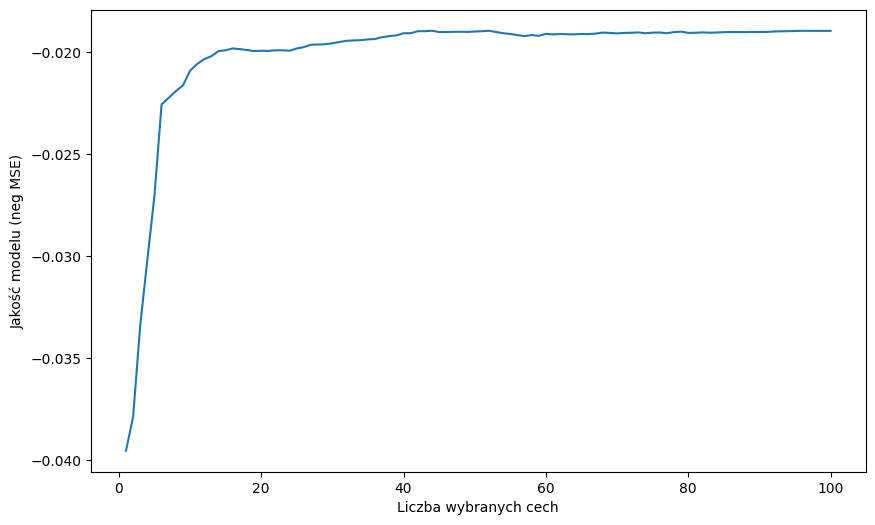

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()


rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)

print(f"Optymalna liczba cech wybrana automatycznie: {rfecv.n_features_}")

selected_features = X.columns[rfecv.support_]
print("Wybrane cechy:")
print(selected_features)


plt.figure(figsize=(10, 6))
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Jakość modelu (neg MSE)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

X_selected = X[selected_features]

##Podział danych na treningowe i testowe

In [ ]:
from sklearn.model_selection import train_test_split

# 1. PODZIAŁ DANYCH
# X_selected to Twoje 44 wybrane cechy, y to cel
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=67)

print(f"Dane treningowe: {X_train.shape}")
print(f"Dane testowe: {X_test.shape}")

Dane treningowe: (1495, 44)
Dane testowe: (499, 44)


# Drzewo Regresyjne

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1) Pipeline: imputacja braków + drzewo regresyjne
pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("model", DecisionTreeRegressor(random_state=42))
])

# 2) Siatka hiperparametrów do strojenia
param_grid = {
    "model__max_depth": [None, 3, 5, 8, 12, 16, 20],
    "model__min_samples_split": [2, 5, 10, 20, 50],
    "model__min_samples_leaf": [1, 2, 5, 10, 20],
    "model__max_features": [None, "sqrt", "log2", 0.5, 0.8],
    "model__ccp_alpha": [0.0, 1e-4, 1e-3, 1e-2]
}

# 3) GridSearchCV
# MAE bardziej pasuje do regresji.
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(X_train, y_train)

print("Best CV score (MAE):", -grid.best_score_)
print("Best params:", grid.best_params_)

best_model = grid.best_estimator_

# 4) Ewaluacja na teście
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nTEST metrics:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 : {r2:.4f}")

# 5) Feature importance - które cechy najbardziej wpływają na wynik regresji
tree = best_model.named_steps["model"]
importances = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("\nTop 15 feature importances:")
print(importances.head(15))




Fitting 5 folds for each of 3500 candidates, totalling 17500 fits
Best CV score (MAE): 0.1041101663921143
Best params: {'model__ccp_alpha': 0.0, 'model__max_depth': 5, 'model__max_features': 0.5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}

TEST metrics:
MAE : 0.1099
RMSE: 0.1593
R^2 : 0.5214

Top 15 feature importances:
PctKids2Par          0.679604
PctIlleg             0.121472
pctWInvInc           0.035622
NumStreet            0.027931
PctRecImmig5         0.027400
PctPersDenseHous     0.023156
NumUnderPov          0.022945
numbUrban            0.015582
PctLargHouseOccup    0.013535
pctWRetire           0.013014
MalePctDivorce       0.005024
MalePctNevMarr       0.004515
RentHighQ            0.004313
HousVacant           0.003083
MedRent              0.002802
dtype: float64


# Regresja Liniowa


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# training
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# prediction
y_train_pred = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"R^2: {r2_lr:.4f}")


Train RMSE: 0.1299
Test RMSE: 0.1377
R^2: 0.6425


# Regresje nie-liniowe.
KNN



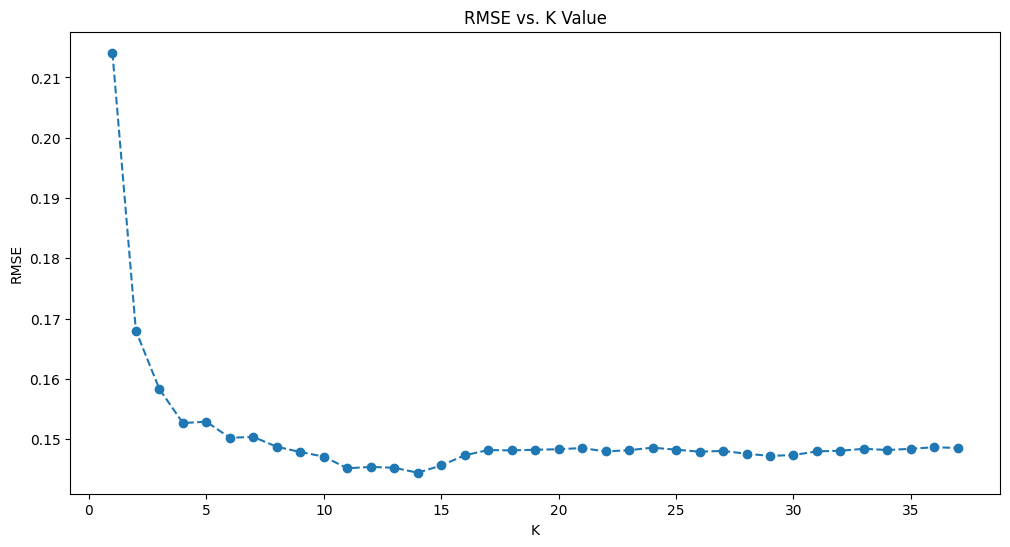

Train RMSE 0.1327
Test RMSE 0.1444
R^2 0.6066


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scalewr = StandardScaler()
X_train_scaled = scalewr.fit_transform(X_train)
X_test_scaled = scalewr.transform(X_test)

rsme_valie = []

# 1 - 38 zaokragolnoy zakres Naszych danych treningowychg
for k in range(1,38):
#stworzenie modelu do knn
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
#zbior testowy
  prediction_test = knn.predict(X_test_scaled)
#rsme dla k
  rsme_valie.append(np.sqrt(mean_squared_error(y_test, prediction_test)))


plt.figure(figsize=(12, 6))
plt.plot(range(1,38), rsme_valie, linestyle='dashed', marker='o')
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()
#nowy model zbudowany dla k z najmniejszym bldedem
bestlow_k = range(1,38)[rsme_valie.index(min(rsme_valie))]
knn1 = KNeighborsRegressor(n_neighbors=bestlow_k)
knn1.fit(X_train_scaled, y_train)
#predykcja
prediction_train = knn1.predict(X_train_scaled) #trenignowe
prediction_test = knn1.predict(X_test_scaled)#testowe

train_rmse = np.sqrt(mean_squared_error(y_train, prediction_train))
test_rmse = np.sqrt(mean_squared_error(y_test, prediction_test))
r2_knn = r2_score(y_test, prediction_test)


print(f"Train RMSE {train_rmse:.4f}")
print(f"Test RMSE {test_rmse:.4f}")
print(f"R^2 {r2_knn:.4f}")

#Sieć neuronowa

In [ ]:
#Perceptrony v2
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=2000, random_state=42)


param_grid = {
    'hidden_layer_sizes': [(50,50), (100,), (100,50,25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

print("Rozpoczynam szukanie optymalnych parametrów (może to chwilę potrwać)...")
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"\nNajlepsze znalezione parametry: {grid_search.best_params_}")


best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
final_r2 = r2_score(y_test, y_pred_best)
final_mae = mean_absolute_error(y_test, y_pred_best)
train_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"\n--- WYNIK OSTATECZNY (Zbiór Testowy) ---")
print(f"R^2: {final_r2:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE (Średni błąd): {train_rmse:.4f}")

Rozpoczynam szukanie optymalnych parametrów (może to chwilę potrwać)...

Najlepsze znalezione parametry: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}

--- WYNIK OSTATECZNY (Zbiór Testowy) ---
R^2: 0.6326
MAE: 0.0956
RMSE (Średni błąd): 0.1396


#Wykresy

##Rozkład zmiennej celu

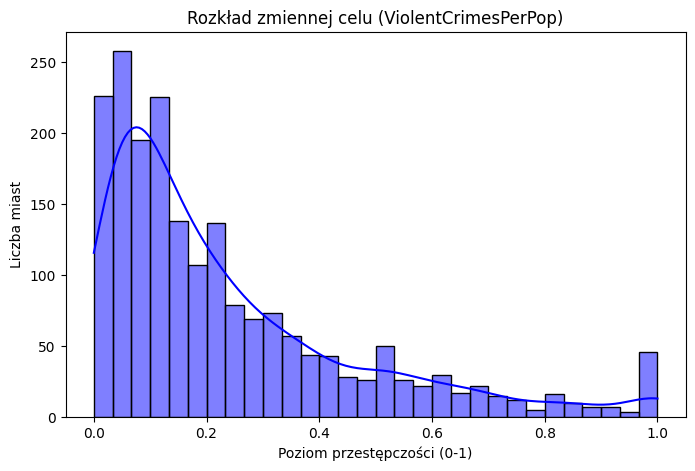

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Rozkład zmiennej celu (ViolentCrimesPerPop)')
plt.xlabel('Poziom przestępczości (0-1)')
plt.ylabel('Liczba miast')
plt.show()

##Wizualizacja predykcji

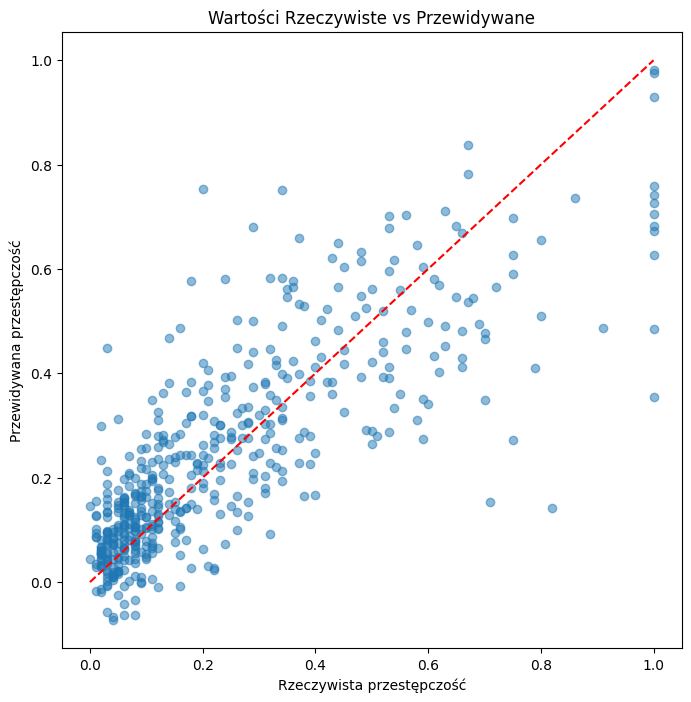

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred_lr, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Wartości Rzeczywiste vs Przewidywane')
plt.xlabel('Rzeczywista przestępczość')
plt.ylabel('Przewidywana przestępczość')
plt.show()

##Wyszukanie najważniejszych cech

/tmp/ipython-input-276203977.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Waga', y='Cecha', data=wagi, palette=colors)


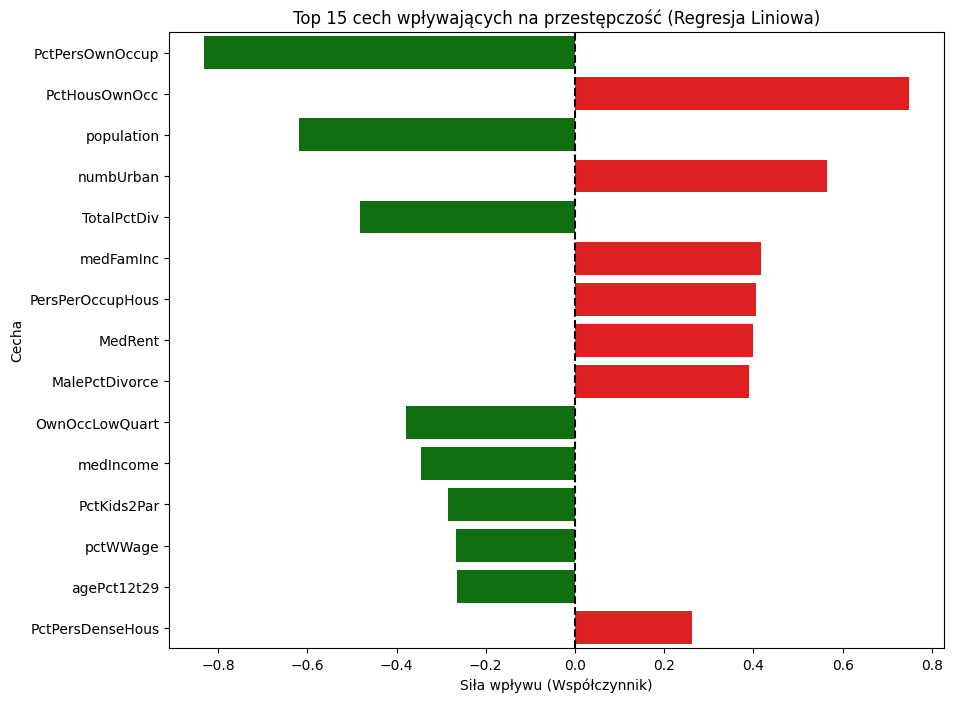

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model = model_lr

wagi = pd.DataFrame({
    'Cecha': X_selected.columns,
    'Waga': model.coef_
})

wagi['Abs_Waga'] = wagi['Waga'].abs()
wagi = wagi.sort_values(by='Abs_Waga', ascending=False).head(15) # Top 15 cech

plt.figure(figsize=(10, 8))
colors = ['red' if x > 0 else 'green' for x in wagi['Waga']]
sns.barplot(x='Waga', y='Cecha', data=wagi, palette=colors)
plt.title('Top 15 cech wpływających na przestępczość (Regresja Liniowa)')
plt.xlabel('Siła wpływu (Współczynnik)')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()